In [1]:
from networkx.algorithms.community.quality import modularity
import networkx as nx
from task6.src import utils, modularity_utils
import pandas as pd


In [2]:
%load_ext autoreload
%autoreload 2

# 6 a)

In [7]:
movies_data = pd.read_csv("./task6/movies/movies/movies.csv")

table_data = []
table_columns = ['ID', 'Movie Title', 'Nodes', 'Edges', 'Communities', 'Modularity']

# Create a DataFrame to store the results
for index, row in movies_data.iterrows():
    
    id = row['ID']
    # print(f"Processing {id}...")    
    name = row['Title']
    num_nodes = row['Characters'] # This is the number of nodes
    num_edges = row['Edges']
    nodes_df, edges_df = utils.get_network_dataframe(id)
    
    # print(f'nodes columns: {nodes_df.columns}')
    # print(f'edges columns: {edges_df.columns}')
    G = utils.create_graph_from_dataframes(nodes_df, edges_df)
    communities, community_data = utils.compute_louvain_communities(G, edges_df)
    # print(f"Number of communities: {community_data['n_communities']}")
    # print(f"Modularity: {community_data['modularity_score']:.4f}")

    num_communities = community_data['n_communities']
    modularity_score = community_data['modularity_score']
    # Create a new row with the data
    row = (id, name, num_nodes, num_edges, num_communities, modularity_score)
    table_data.append(row)
    # print(row)

# Create a DataFrame from the list of rows
table_df = pd.DataFrame(table_data, columns=table_columns)

table_df.sort_values(by='Modularity', ascending=False, inplace=True)
top_6 = table_df.head(6)
top_6

,ID,Movie Title,Nodes,Edges,Communities,Modularity
74,92,Babel,71,154,6,0.690504
711,837,Traffic,68,131,4,0.668580
447,523,Magnolia,82,239,8,0.662979
342,402,Highlander,59,108,5,0.606953
328,386,He's Just Not That Into You,51,114,4,0.603339
88,110,Batman Returns,51,124,6,0.579572


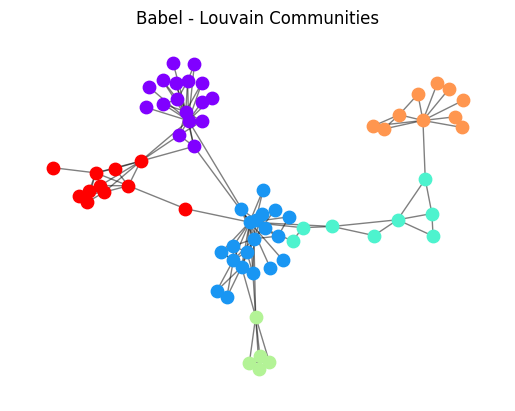

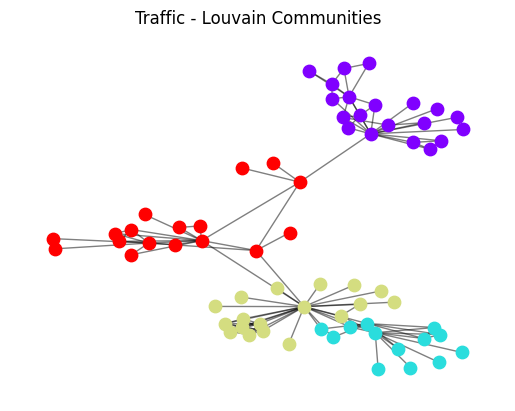

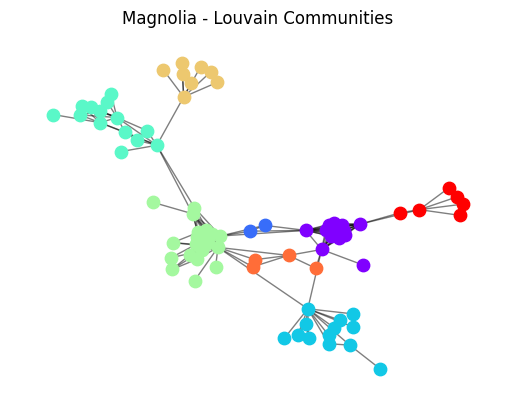

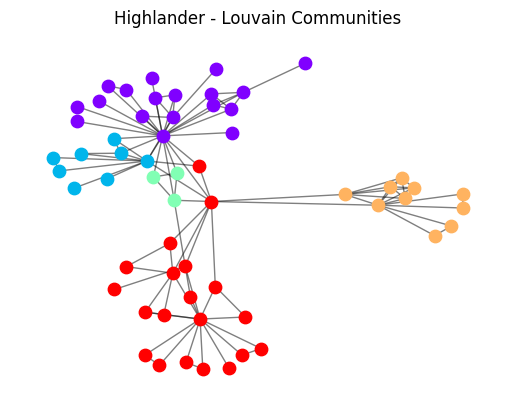

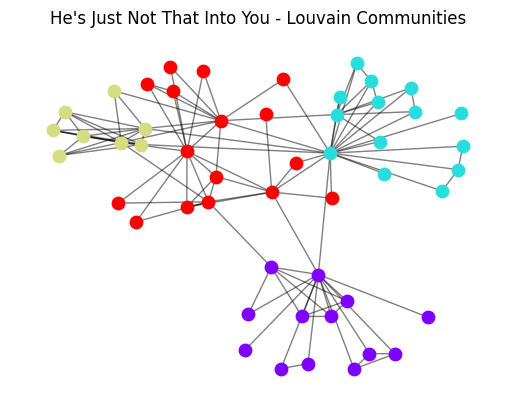

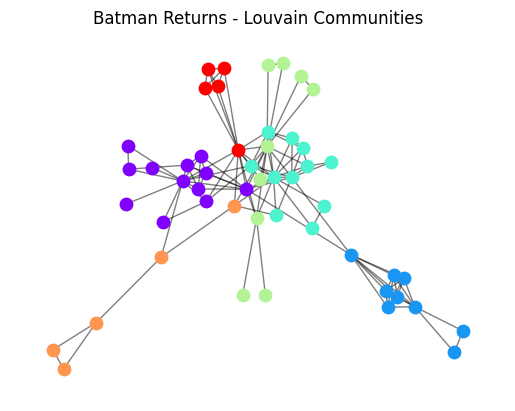

In [10]:
for index, row in top_6.iterrows():
    id = row['ID']
    # print(f"Processing {id}...")    
    name = row['Movie Title']
    num_nodes = row['Nodes']
    num_edges = row['Edges']
    nodes_df, edges_df = utils.get_network_dataframe(id)
    
    # print(f'nodes columns: {nodes_df.columns}')
    # print(f'edges columns: {edges_df.columns}')
    G = utils.create_graph_from_dataframes(nodes_df, edges_df)
    communities, community_data = utils.compute_louvain_communities(G, edges_df)
    # print(f"Number of communities: {community_data['n_communities']}")
    # print(f"Modularity: {community_data['modularity_score']:.4f}")
    utils.visualize_communities(G, communities, name)

a) R: We approached the problem by applying the Louvain Algorithm to all the networks and sorting them by descending modularity. The top 6 modularity scores are for "Babel", "Traffic", "Magnolia", "Highlander", "He's Just Not That Into You" and "Batman Returns" ordered by higher modularity to lower. When analyzing the networks we can see community structure mainly for the 3 networks, since the nodes are clearly well connected and separated from the other clusters exposing the community structures. For the last 3 as the modularity decreases, harder is to notice the community structures. In these last cases we have more separated nodes without clear clustering or aggregation in general. In some cases there are clusters or defined communities but not at entire network level.

# 6 b)

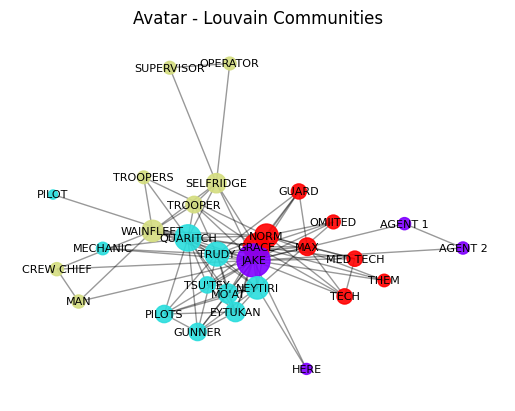

In [11]:
nodes_df, edges_df = utils.get_network_dataframe(88)
G = utils.create_graph_from_dataframes(nodes_df, edges_df)
communities, _ = utils.compute_louvain_communities(G, edges_df)
pagerank_scores = utils.compute_pagerank(G, edges_df)
labels = {node: G.nodes[node].get('label') for node in G.nodes()}
# print(labels)
utils.visualize_communities_pgrank(G, communities, title="Avatar", pagerank_scores=pagerank_scores)

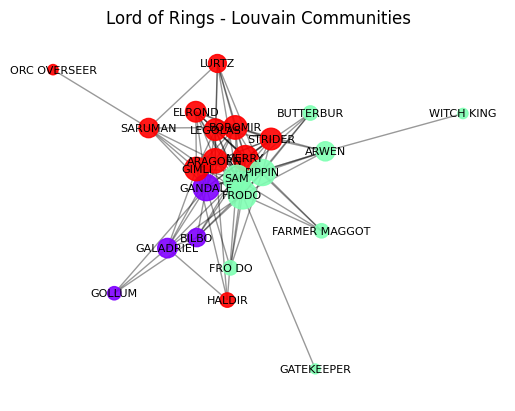

In [ ]:

nodes_df, edges_df = utils.get_network_dataframe(512)
G = utils.create_graph_from_dataframes(nodes_df, edges_df)
communities, _ = utils.compute_louvain_communities(G, edges_df)
pagerank_scores = utils.compute_pagerank(G, edges_df)
labels = {node: G.nodes[node].get('label') for node in G.nodes()}
# print(labels)
utils.visualize_communities_pgrank(G, communities, title="Lord of Rings", pagerank_scores=pagerank_scores)

b) R: For this task the network was constructed using the node labels, the pagerank value obtained by NetworkX.pagerank function, the colors for the nodes were determined using community ids generated by the Louvain Algorithm. We selected the films Avatar (88) - node degree 0.27 - and The Lord of Rings (512) - node degree 0.11.
For Avatar we can notice some understandable community aggregations in terms of colors, but they are not well separated. For example we have the scientists (Grace, Norm, Max...) aggregated in the same community. Jake is the central point of the history and have high betweenes in the network. He is classified in a separated community and makes sense because of his dynamic role in the history construction. The Na'vi characters (Tsu'Tey, Neytiri, Mo'At..) a are also aggregated in the same community. We don't have for any of these communities a clear community structure.
For Lord of the Rings network we also don't findclear community structure defined. However, in the communities we can notice the representation aggregations that are reflected in the film history. The hobbities are classified in the same community (Sam, Pippin, Frodo). They are closelly linked to Gandlaf, which belongs to same community of Galladriel. In other hand there is a aggregation of knights (Gimli, Aragorn, Legolas, Boromir) but having in the same community the Saruman. This community reflects some ambiguity and not clear definition. 

# 6 c)

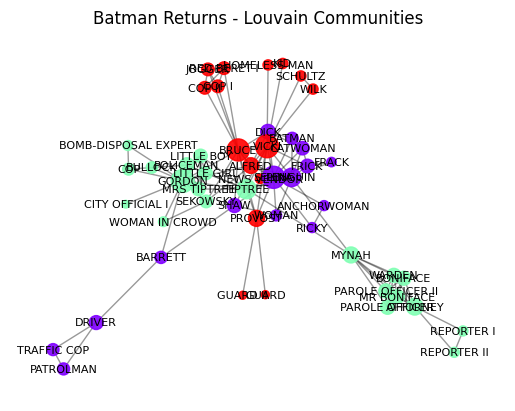

Modularity (local implementation): 0.4822
Modularity (networkx): 0.4749


In [28]:
nodes_df, edges_df = utils.get_network_dataframe(110)
G = utils.create_graph_from_dataframes(nodes_df, edges_df)
comm_2, progress_scores = modularity_utils.greedy_agglomerative(G)
pagerank_scores = utils.compute_pagerank(G, edges_df)
labels = {node: G.nodes[node].get('label') for node in G.nodes()}
# print(labels)
utils.visualize_communities_pgrank(G, comm_2, title="Batman Returns", pagerank_scores=pagerank_scores)
modularity_local_implementation = sum(modularity_utils.get_intra_community_modularity(G, comm) for comm in comm_2)
print(f"Modularity (local implementation): {modularity_local_implementation:.4f}")
# Example usage of the networkx modularity function
communities, community_data = utils.compute_louvain_communities(G, edges_df)
modularity_score = modularity(G, communities)
print(f"Modularity (networkx): {modularity_score:.4f}")

c) R: We found similar results for modularity but not the same values. At the end it impacted also in the communities composition. In this example we had 0.48 as modularity result whereas the NetworkX implementation found 0.57. To execute the program it is needed to:
1. execute the ./task6/src/main.py using the "python main.py" command. The program will ask inputs and output the modularity results of self implemented algorithm